## Using GP as a optimizator

0 iteration with fitness = 0.000135367571727385
10 iteration with fitness = 0.10097506163245928
20 iteration with fitness = 0.31471480091446014
30 iteration with fitness = 0.6515850035524453
40 iteration with fitness = 0.7363959163501574
50 iteration with fitness = 0.763034867107927
60 iteration with fitness = 0.763034867107927
70 iteration with fitness = 0.8062590270490979
80 iteration with fitness = 0.8271581691924522
90 iteration with fitness = 0.8271581691924522
The fittest individ: ((((x0/6) * (((x0 + (7 + x0))/(x0 + 6)) * 9))/4) + (((((x0 + 4)/8.2401) * ((6 + 6.2146) + (6.2146 + 4)))/((6.2146/x0) * (6.2146/x0)))/(-(9/(x0 + (6 + x0))) + -2.4672)))
with fitness 0.8298664948748287


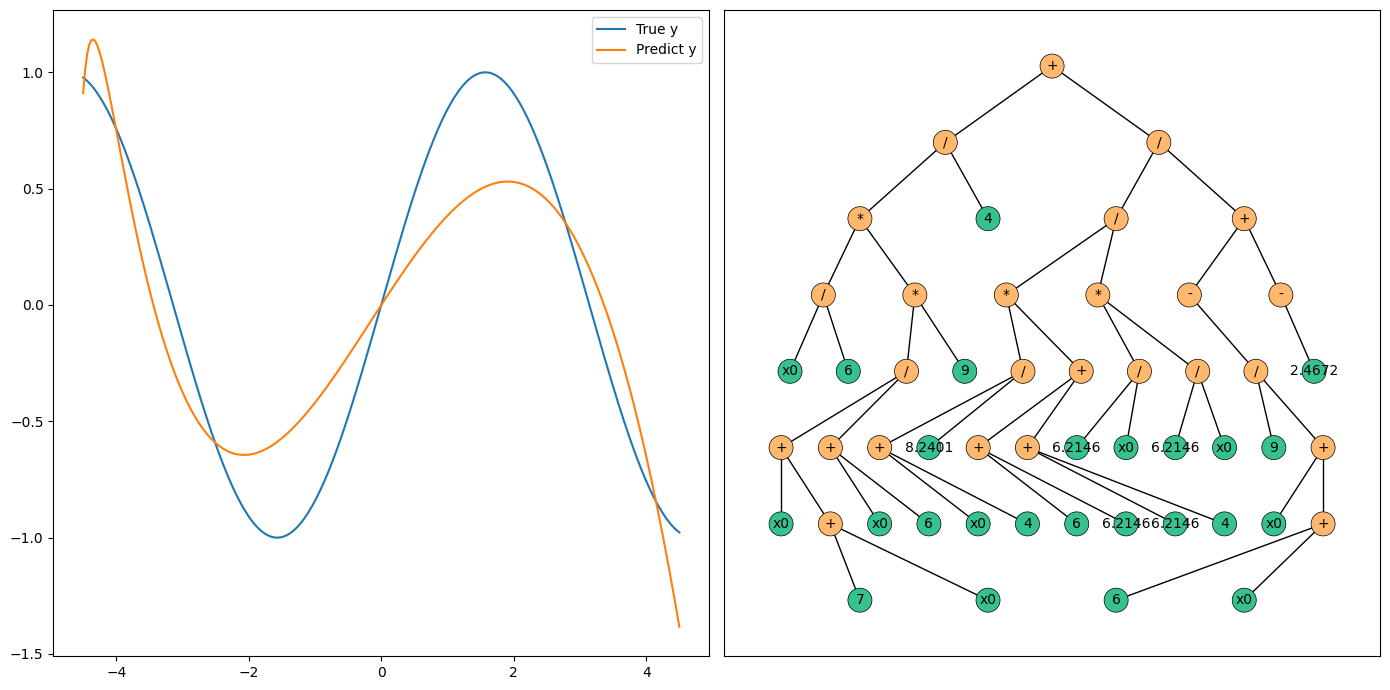

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thefittest.base import FunctionalNode
from thefittest.base import TerminalNode
from thefittest.base import EphemeralNode
from thefittest.base import UniversalSet
from thefittest.optimizers import GeneticProgramming
from thefittest.tools.operators import Mul
from thefittest.tools.operators import Add
from thefittest.tools.operators import Div
from thefittest.tools.operators import Neg
from thefittest.tools.metrics import coefficient_determination
from thefittest.tools.print import print_tree


def generator1():
    return np.round(np.random.uniform(0, 10), 4)


def generator2():
    return np.random.randint(0, 10)


def problem(x):
    return np.sin(x[:,0])


function = problem
left_border = -4.5
right_border = 4.5
sample_size = 300
n_dimension = 1

number_of_iterations = 100
population_size = 500

X = np.array([np.linspace(left_border, right_border, sample_size)
              for _ in range(n_dimension)]).T
y = function(X)


functional_set = (FunctionalNode(Add()),
                  FunctionalNode(Mul()),
                  FunctionalNode(Neg()),
                  FunctionalNode(Div()))


terminal_set = [TerminalNode(X[:, i], f'x{i}') for i in range(n_dimension)]
terminal_set.extend([EphemeralNode(generator1), EphemeralNode(generator2)])
uniset = UniversalSet(functional_set, tuple(terminal_set))


def fitness_function(trees):
    fitness = []
    for tree in trees:
        y_pred = tree()*np.ones(len(y))
        fitness.append(coefficient_determination(y, y_pred))
    return np.array(fitness)


optimizer = GeneticProgramming(fitness_function=fitness_function,
                               uniset=uniset,
                               pop_size=population_size,
                               iters=number_of_iterations,
                               show_progress_each=10,
                               minimization=False,
                               keep_history=False, 
                               selection="tournament_k",
                               mutation="gp_weak_grow", 
                               tour_size=5,
                               max_level=7)

optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

predict = fittest['phenotype']()

print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=1)

ax[0].plot(X[:,0], y, label = "True y")
ax[0].plot(X[:,0], predict, label = "Predict y")
ax[0].legend()

print_tree(tree=fittest['phenotype'], ax=ax[1])

plt.tight_layout()
plt.show()

## Using SelfCGP as a optimizator

0 iteration with fitness = 0.08228809504863432
10 iteration with fitness = 0.31475716331395776
20 iteration with fitness = 0.5203281545998018
30 iteration with fitness = 0.6449048635619659
40 iteration with fitness = 0.8434769010167018
50 iteration with fitness = 0.8536244767073351
60 iteration with fitness = 0.873772739383813
70 iteration with fitness = 0.8822254718187788
80 iteration with fitness = 0.8822254718187788
90 iteration with fitness = 0.8822254718187788
The fittest individ: ((((((-9 + 1.3676)/1.3676)/x0) + (((((((8.474 * -(0/3.7788)) + x0)/(2.0597/x0))/((8.474/x0) + ((-x0 * -(0/3.7788)) + (((((-9/1.3676)/x0) + x0)/(2/x0))/(9/x0))))) + ((-x0 * -(0/3.7788)) + ((((8.474 * -(0/3.7788)) + x0)/(2/x0))/(9/x0))))/(2/x0))/(9/x0)))/(1.3676/x0))/(-9 + 1.3676))
with fitness 0.8822254718187788


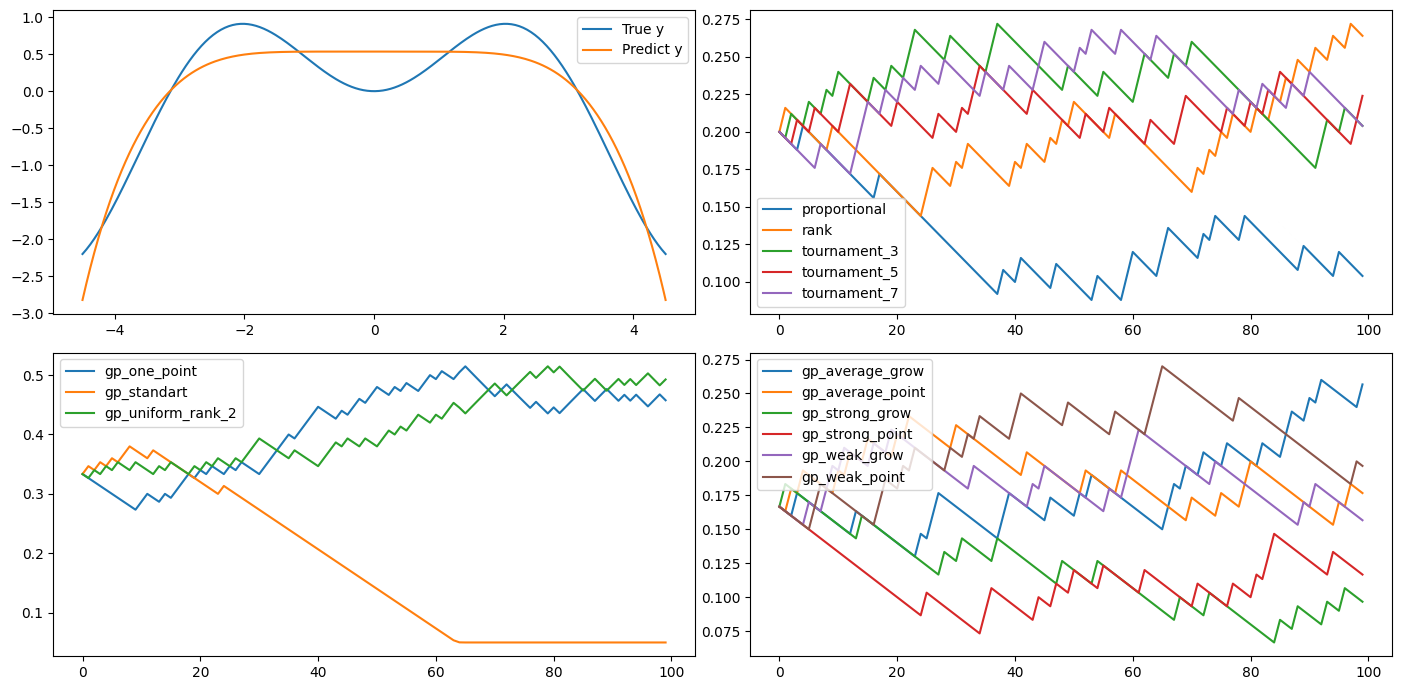

In [2]:
from collections import defaultdict
from thefittest.optimizers import SelfCGP


def problem(x):
    return np.sin(x[:,0])*x[:,0]*0.5


function = problem
y = function(X)

functional_set = (FunctionalNode(Add()),
                  FunctionalNode(Mul()),
                  FunctionalNode(Neg()),
                  FunctionalNode(Div()))

terminal_set = [TerminalNode(X[:, i], f'x{i}') for i in range(n_dimension)]
terminal_set.extend([EphemeralNode(generator1), EphemeralNode(generator2)])
uniset = UniversalSet(functional_set, tuple(terminal_set))


def fitness_function(trees):
    fitness = []
    for tree in trees:
        y_pred = tree()*np.ones(len(y))
        fitness.append(coefficient_determination(y, y_pred))
    return np.array(fitness)


optimizer = SelfCGP(fitness_function=fitness_function,
                    uniset=uniset,
                    pop_size=population_size,
                    iters=number_of_iterations,
                    show_progress_each=10,
                    minimization=False,
                    keep_history=True)

optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

predict = fittest['phenotype']()

print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=2)


ax[0][0].plot(X[:,0], y, label = "True y")
ax[0][0].plot(X[:,0], predict, label = "Predict y")
ax[0][0].legend()

selectiom_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['s_proba'][i].items():
        selectiom_proba[key].append(value)
    
for key, value in selectiom_proba.items():
    ax[0][1].plot(range(number_of_iterations), value, label = key)
ax[0][1].legend()

crossover_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['c_proba'][i].items():
        crossover_proba[key].append(value)
    
for key, value in crossover_proba.items():
    ax[1][0].plot(range(number_of_iterations), value, label = key)
ax[1][0].legend()

mutation_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['m_proba'][i].items():
        mutation_proba[key].append(value)
    
for key, value in mutation_proba.items():
    ax[1][1].plot(range(number_of_iterations), value, label = key)
ax[1][1].legend()

plt.tight_layout()
plt.show()

## Using GP as a machine learning model

0 iteration with fitness = 0.012066967271911921
10 iteration with fitness = 0.21639814865440776
20 iteration with fitness = 0.23668986740896025
30 iteration with fitness = 0.23668986740896025
40 iteration with fitness = 0.23668986740896025
50 iteration with fitness = 0.23668986740896025
60 iteration with fitness = 0.23668986740896025
70 iteration with fitness = 0.23668986740896025
80 iteration with fitness = 0.23668986740896025
90 iteration with fitness = 0.23668986740896025
The fittest individ: ((sin((sin(x0)**2)) * (1/-(-(0 * 9) * sin(cos((x0**2)))))) * cos((x0**2)))
with fitness 0.23668986740896025


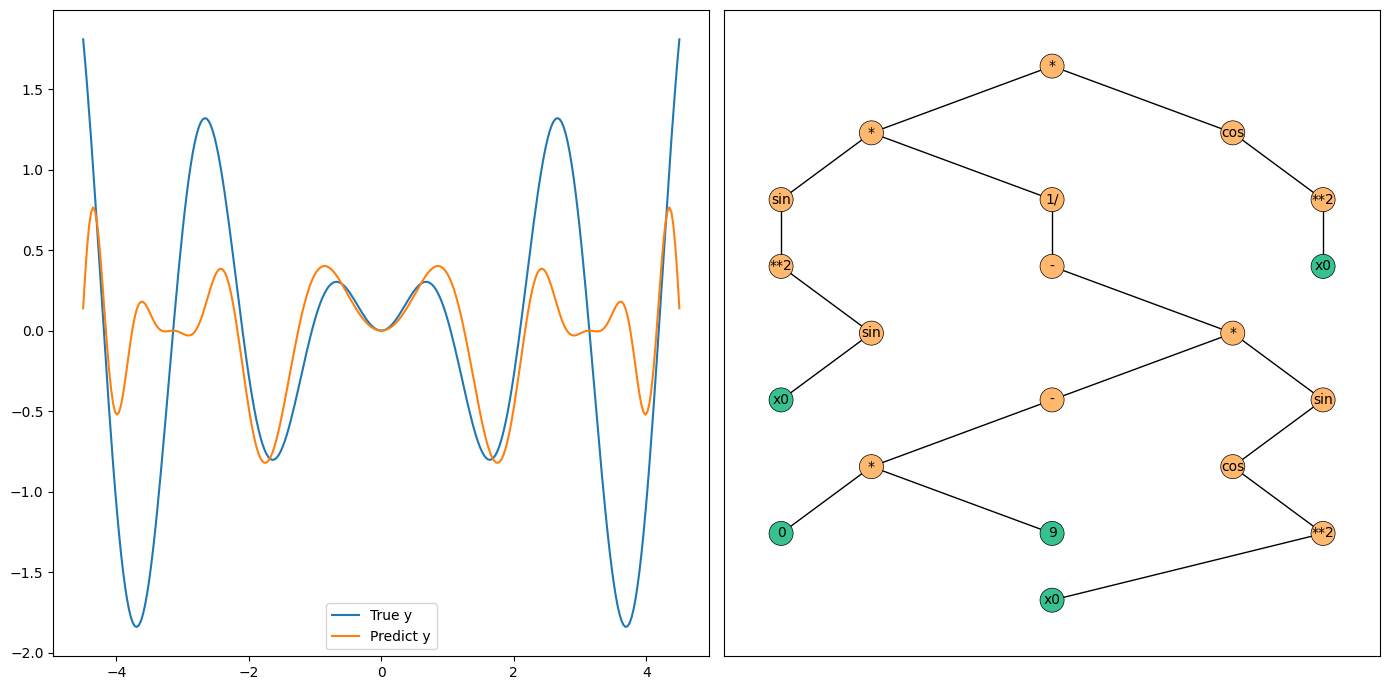

In [3]:
from thefittest.regressors import SymbolicRegressionGP


def problem(x):
    return np.sin(x[:,0]*3)*x[:,0]*0.5


function = problem
y = function(X)


model = SymbolicRegressionGP(iters=number_of_iterations,
                             pop_size=population_size,
                             optimizer=GeneticProgramming,
                             optimizer_args={"crossover": "gp_standart",
                                             "keep_history": True,
                                             "show_progress_each": 10,
                                             "elitism": False})

model.fit(X, y)

predict = model.predict(X)

fittest = model.get_optimizers()[0].get_fittest()
stats = model.get_optimizers()[0].get_stats()

print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=1)

ax[0].plot(X[:,0], y, label = "True y")
ax[0].plot(X[:,0], predict, label = "Predict y")
ax[0].legend()

print_tree(tree=fittest['phenotype'], ax=ax[1])

plt.tight_layout()
plt.show()

## Using SelfCGP as a machine learning model

0 iteration with fitness = 0.004661734380056348
10 iteration with fitness = 0.08583530000780948
20 iteration with fitness = 0.22483092603139987
30 iteration with fitness = 0.41756715429364
40 iteration with fitness = 0.5122111724028436
50 iteration with fitness = 0.5930865970176381
60 iteration with fitness = 0.6710005947321906
70 iteration with fitness = 0.6934050983384477
80 iteration with fitness = 0.6967721678051353
90 iteration with fitness = 0.7074835239036363
The fittest individ: (cos(((sin((cos((sin(sin(sin(x0)))**2)) * -x0))**2)**2)) * (cos(((sin((cos((sin(sin(x0))**2)) * -x0))**2)**2)) * (cos((((sin((cos((sin(sin(sin(x0)))**2)) * -x0))**2)**2)**2)) * (cos(((sin((cos((sin(sin(sin(x0)))**2)) * -x0))**2)**2)) * sin((((cos(((sin(x0)**2)**2)) * (cos(((sin(x0)**2)**2)) * -x0))**2) * sin(sin((1/0.1505)))))))))
with fitness 0.7098334504540653


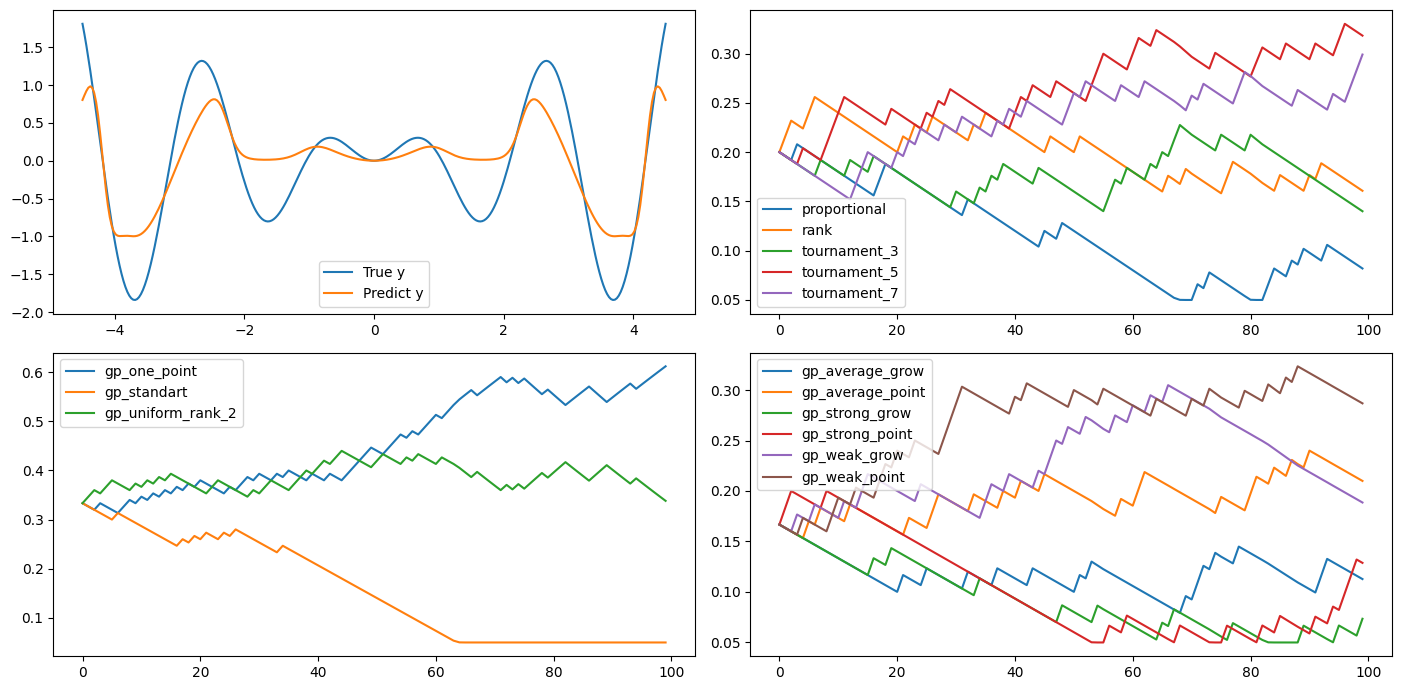

In [4]:
from thefittest.regressors import SymbolicRegressionGP


model = SymbolicRegressionGP(iters=number_of_iterations,
                             pop_size=population_size,
                             optimizer=SelfCGP,
                             optimizer_args={"keep_history": True,
                                             "show_progress_each": 10,
                                             "elitism": True})

model.fit(X, y)

predict = model.predict(X)

fittest = model.get_optimizers()[0].get_fittest()
stats = model.get_optimizers()[0].get_stats()

print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=2)


ax[0][0].plot(X[:,0], y, label = "True y")
ax[0][0].plot(X[:,0], predict, label = "Predict y")
ax[0][0].legend()

selectiom_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['s_proba'][i].items():
        selectiom_proba[key].append(value)
    
for key, value in selectiom_proba.items():
    ax[0][1].plot(range(number_of_iterations), value, label = key)
ax[0][1].legend()

crossover_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['c_proba'][i].items():
        crossover_proba[key].append(value)
    
for key, value in crossover_proba.items():
    ax[1][0].plot(range(number_of_iterations), value, label = key)
ax[1][0].legend()

mutation_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['m_proba'][i].items():
        mutation_proba[key].append(value)
    
for key, value in mutation_proba.items():
    ax[1][1].plot(range(number_of_iterations), value, label = key)
ax[1][1].legend()

plt.tight_layout()
plt.show()